In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
true_df = pd.read_csv('True.csv.zip')
fake_df = pd.read_csv('Fake.csv.zip')

# Add a label column: 1 for True news, 0 for Fake
true_df['label'] = 1
fake_df['label'] = 0

# Combine both
data = pd.concat([true_df, fake_df], axis=0)
data = data.sample(frac=1).reset_index(drop=True)  # shuffle
data.head()


,title,text,subject,date,label
0,"U.S. Congress shrugs off guns, Zika as summer ...",WASHINGTON (Reuters) - The U.S. Congress is he...,politicsNews,"July 12, 2016",1
1,Meet The CA Sheriff Who Won’t Be Bullied By Ob...,If you have a system that rewards you for bei...,left-news,"Apr 9, 2015",0
2,Corporate AMT likely will not be in final U.S....,WASHINGTON (Reuters) - The chairman of the U.S...,politicsNews,"December 6, 2017",1
3,Trump rebukes South Korea after North Korean b...,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"September 3, 2017",1
4,U.S. SPY SATELLITES Detect North Korea Transfe...,While the main stream media continues to chase...,politics,"Aug 8, 2017",0


In [7]:
X = data['text']   # news content
y = data['label']  # 0/1

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=200)

Accuracy: 0.9871937639198218
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4692
           1       0.99      0.99      0.99      4288

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



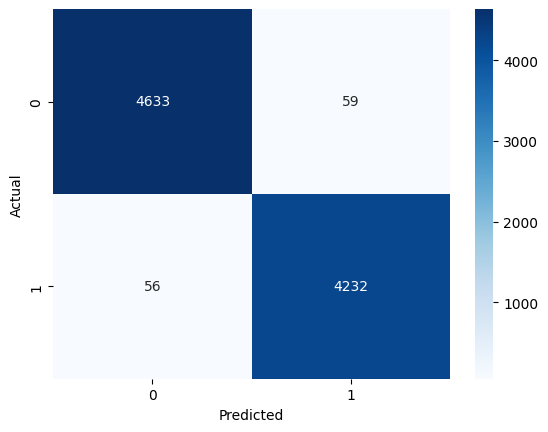

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


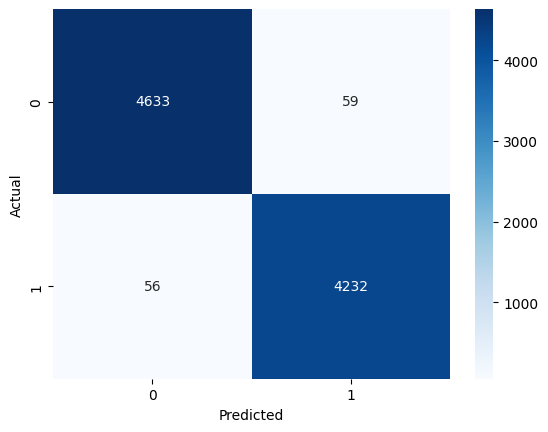

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
